<a href="https://colab.research.google.com/github/ykitaguchi77/MRI_segmentation/blob/main/Show_DICOM_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**View DICOM files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom

###**DICOMファイルに拡張子を追加**

In [23]:
import os

# 指定されたフォルダのパス
parent_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/SampleImage"

# os.walkを使用してフォルダ内のすべてのファイルを再帰的に探索
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # ファイル名と拡張子を分割
        file_name, file_ext = os.path.splitext(file)

        # 拡張子がない場合
        if not file_ext:
            # 元のファイルのフルパス
            old_file_path = os.path.join(root, file)

            # 新しいファイル名（拡張子 ".dcm" を追加）
            new_file_name = file_name + ".dcm"

            # 新しいファイルのフルパス
            new_file_path = os.path.join(root, new_file_name)

            # ファイル名を変更
            os.rename(old_file_path, new_file_path)

            print(f"ファイル名を変更しました: {file} -> {new_file_name}")

###**フォルダのリストを表示**

In [24]:
import os

# 指定されたフォルダのパス
parent_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/SampleImage"

# フォルダ内のフォルダをリストで取得
folders = [dir for dir in os.listdir(parent_path) if os.path.isdir(os.path.join(parent_path, dir))]

# フォルダ名を数字の順にソート
sorted_folders = sorted(folders, key=lambda x: int(x[2:]))

# フォルダのリストを表示
print("フォルダのリスト:")
for folder in sorted_folders:
    print(folder)

フォルダのリスト:
SE00000
SE00001
SE00002
SE00003
SE00004


In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# 指定されたフォルダのパス
folder_num = 2
folder_path = f"{parent_path}/{sorted_folders[folder_num]}"

# フォルダ内の.dcmファイルをリストで取得
dcm_files = [file for file in os.listdir(folder_path) if file.endswith(".dcm")]

# .dcmファイルを3桁目からの数字でソート
sorted_dcm_files = sorted(dcm_files, key=lambda x: int(x[2:-4]))

# 各.dcmファイルを読み込んで画像として表示
for i, dcm_file in enumerate(sorted_dcm_files):
    # .dcmファイルのフルパスを取得
    dcm_path = os.path.join(folder_path, dcm_file)

    # pydicomを使用して.dcmファイルを読み込む
    dcm_data = pydicom.dcmread(dcm_path)

    # 画像データを取得
    image_data = dcm_data.pixel_array

    # 画像のピクセル数を取得
    rows, cols = image_data.shape

    # 画像を表示
    fig, ax = plt.subplots(figsize=(cols/100, rows/100))
    ax.imshow(image_data, cmap="gray")
    ax.set_title(dcm_file)
    ax.axis("off")

    plt.tight_layout()
    plt.show()

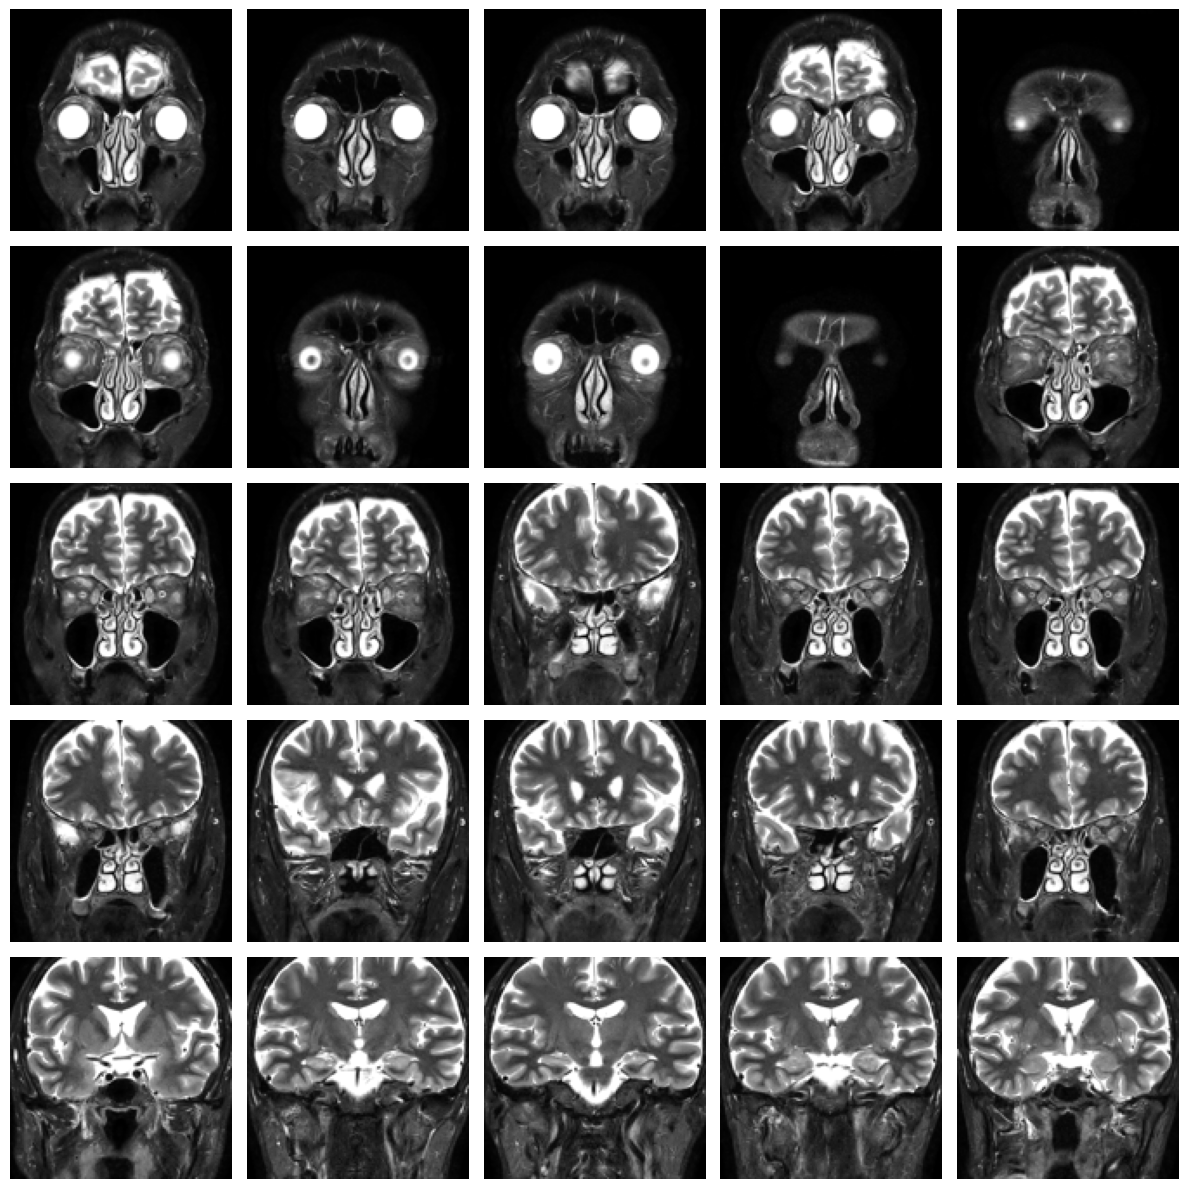

In [37]:
import os
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

# 指定されたフォルダのパス
input_folder_path = folder_path

# フォルダ内の.dcmファイルをリストで取得
dcm_files = [file for file in os.listdir(input_folder_path) if file.endswith(".dcm")]

# .dcmファイルを3桁目からの数字でソート
sorted_dcm_files = sorted(dcm_files, key=lambda x: int(x[2:6]))

# 画像を表示するための図を作成
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

# 各.dcmファイルを読み込んでリサイズして表示
for i, dcm_file in enumerate(sorted_dcm_files):
    # .dcmファイルのフルパスを取得
    dcm_path = os.path.join(input_folder_path, dcm_file)

    # pydicomを使用して.dcmファイルを読み込む
    dcm_data = pydicom.dcmread(dcm_path)

    # 画像データを取得
    image_data = dcm_data.pixel_array

    # PIL.Imageを使用して画像を作成し、モードを「L」に変換
    image = Image.fromarray(image_data).convert("L")

    # 画像をリサイズ
    resized_image = image.resize((128, 128))

    # リサイズした画像を表示
    axes[i].imshow(resized_image, cmap="gray")
    axes[i].axis("off")

    # 25枚の画像を表示したら終了
    if i == 24:
        break

plt.tight_layout()
plt.show()

In [38]:
import os
import pydicom
from PIL import Image

# 指定されたフォルダのパス
input_folder_path = folder_path
output_folder_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/OutputImage"


# 出力フォルダ名を入力フォルダ名から取得
output_folder_name = os.path.basename(input_folder_path)

# 出力フォルダのフルパスを作成
output_folder_full_path = os.path.join(output_folder_path, output_folder_name)

# 出力フォルダが存在しない場合は作成
os.makedirs(output_folder_full_path, exist_ok=True)

# フォルダ内の.dcmファイルをリストで取得
dcm_files = [file for file in os.listdir(input_folder_path) if file.endswith(".dcm")]

# .dcmファイルを3桁目からの数字でソート
sorted_dcm_files = sorted(dcm_files, key=lambda x: int(x[2:6]))

# 各.dcmファイルを読み込んでJPEGで保存
for dcm_file in sorted_dcm_files:
    # .dcmファイルのフルパスを取得
    dcm_path = os.path.join(input_folder_path, dcm_file)

    # pydicomを使用して.dcmファイルを読み込む
    dcm_data = pydicom.dcmread(dcm_path)

    # 画像データを取得
    image_data = dcm_data.pixel_array

    # PIL.Imageを使用して画像を作成し、モードを「L」に変換
    image = Image.fromarray(image_data).convert("L")

    # 画像をJPEGで保存
    output_file_name = f"{os.path.splitext(dcm_file)[0]}.jpg"
    output_file_path = os.path.join(output_folder_full_path, output_file_name)
    image.save(output_file_path, "JPEG")